In [15]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahekdesai02","key":"74d461d1c8380b437e1723b1db249556"}'}

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Kaggle API configured")


✅ Kaggle API configured


In [17]:
!kaggle datasets download -d pkdarabi/vehicle-detection-image-dataset


Dataset URL: https://www.kaggle.com/datasets/pkdarabi/vehicle-detection-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 55% 145M/262M [00:00<00:00, 1.49GB/s]
100% 262M/262M [00:02<00:00, 112MB/s] 


In [18]:
!unzip -q vehicle-detection-image-dataset.zip
print("✅ Dataset extracted")


✅ Dataset extracted


In [19]:
!pip install ultralytics --quiet


In [20]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))


CUDA available: True
GPU: Tesla T4


In [21]:
DATASET_PATH = "No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8"


In [22]:
import os
print(os.listdir(DATASET_PATH))


['train', 'valid', 'data.yaml', 'test']


In [23]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # lightweight, perfect for hackathon

model.train(
    data=f"{DATASET_PATH}/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0,
    workers=4
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7992398a0770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [24]:
model.val(data=f"{DATASET_PATH}/data.yaml")


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1916.0±663.3 MB/s, size: 73.9 KB)
val: Scanning /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 28/28 51.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.4it/s 1.5s
                   all         28        563      0.633      0.651      0.642      0.403
                   Bus          6          6      0.673      0.833      0.698      0.369
                   Car         23        398      0.635      0.811      0.809      0.559
            Motorcycle         18         92      0.819      0.587      0.615      0.339
                Pickup         22         59      0.689      0.525      0.609      

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7991591ffe30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [25]:
model.predict(
    source=f"{DATASET_PATH}/valid/images",
    conf=0.4,
    save=True
)



image 1/28 /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images/frame_0143_jpg.rf.f11c115e321f53745290e2b2dfcad380.jpg: 640x640 2 Cars, 1 Truck, 7.3ms
image 2/28 /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images/frame_0911_jpg.rf.f800706c68aaa14bb6a69146facf7e48.jpg: 640x640 22 Cars, 2 Motorcycles, 7.3ms
image 3/28 /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images/frame_1002_jpg.rf.2b25d8377146e3cf66aea4b2f3836d2d.jpg: 640x640 11 Cars, 7 Motorcycles, 2 Pickups, 7.3ms
image 4/28 /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images/frame_1007_jpg.rf.0cbfce7666ca0c0b40922863f0b9484c.jpg: 640x640 14 Cars, 6 Motorcycles, 1 Pickup, 7.3ms
image 5/28 /content/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/images/frame_1010_jpg.rf.130eb218ff310e902d6f889e3fc756ee.jpg: 640x640 15 Cars, 6 Motorcycles, 2 Pickups, 7.3ms

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Pickup', 4: 'Truck'}
 obb: None
 orig_img: array([[[203, 201, 193],
         [203, 201, 193],
         [203, 201, 193],
         ...,
         [ 95,  95,  81],
         [ 96,  96,  82],
         [ 98,  98,  84]],
 
        [[203, 201, 193],
         [203, 201, 193],
         [203, 201, 193],
         ...,
         [ 96,  96,  82],
         [ 96,  96,  82],
         [ 98,  98,  84]],
 
        [[203, 201, 193],
         [203, 201, 193],
         [203, 201, 193],
         ...,
         [ 97,  97,  83],
         [ 96,  96,  82],
         [ 96,  96,  82]],
 
        ...,
 
        [[ 99, 100,  98],
         [100, 101,  99],
         [101, 102, 100],
         ...,
         [ 95,  96,  92],
         [ 87,  88,  84],
         [ 71,  72,  68]],
 
        [[ 98,  99,  97],
         [ 99, 100,  98],
         

In [26]:
model.predict(
    source="Sample_Video_HighQuality.mp4",
    conf=0.4,
    save=True
)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1001) /content/Sample_Video_HighQuality.mp4: 384x640 12 Cars, 1 Motorcycle, 40.5ms
video 1/1 (frame 2/1001) /content/Sample_Video_HighQuality.mp4: 384x640 10 Cars, 1 Motorcycle, 8.1ms
video 1/1 (frame 3/1001) /content/Sample_Video_HighQuality.mp4: 384x640 9 Cars, 1 Motorcycle, 13.0ms
video 1/1 (frame 4/1001) /content/Sample_Video_HighQuality.mp4: 384x640 10 Cars, 1 Motorcycle, 7.5ms
video 1/1 (frame 5/1001) /content/Sample_Video_HighQu

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Pickup', 4: 'Truck'}
 obb: None
 orig_img: array([[[110, 129, 138],
         [111, 130, 139],
         [112, 131, 140],
         ...,
         [203, 204, 199],
         [202, 203, 198],
         [206, 207, 202]],
 
        [[110, 129, 138],
         [111, 130, 139],
         [112, 131, 140],
         ...,
         [195, 196, 191],
         [193, 194, 189],
         [196, 197, 192]],
 
        [[110, 129, 138],
         [111, 130, 139],
         [112, 131, 140],
         ...,
         [194, 195, 190],
         [190, 191, 186],
         [194, 195, 190]],
 
        ...,
 
        [[ 93,  86,  83],
         [ 93,  86,  83],
         [ 93,  86,  83],
         ...,
         [ 95,  88,  85],
         [ 95,  88,  85],
         [ 95,  88,  85]],
 
        [[ 93,  86,  83],
         [ 93,  86,  83],
         

In [27]:
import os
os.listdir("runs/detect/train/weights")


['best.pt', 'last.pt']

In [28]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
print("✅ Trained model loaded")


✅ Trained model loaded


In [29]:
results = model.predict(
    source="Sample_Video_HighQuality.mp4",
    conf=0.4,
    stream=True  # IMPORTANT
)


In [30]:
vehicle_counts = []

for frame_id, r in enumerate(results):
    count = len(r.boxes)   # number of detected vehicles
    vehicle_counts.append(count)

vehicle_counts[:10]



video 1/1 (frame 1/1001) /content/Sample_Video_HighQuality.mp4: 384x640 12 Cars, 1 Motorcycle, 7.0ms
video 1/1 (frame 2/1001) /content/Sample_Video_HighQuality.mp4: 384x640 10 Cars, 1 Motorcycle, 6.5ms
video 1/1 (frame 3/1001) /content/Sample_Video_HighQuality.mp4: 384x640 9 Cars, 1 Motorcycle, 7.5ms
video 1/1 (frame 4/1001) /content/Sample_Video_HighQuality.mp4: 384x640 10 Cars, 1 Motorcycle, 6.5ms
video 1/1 (frame 5/1001) /content/Sample_Video_HighQuality.mp4: 384x640 14 Cars, 1 Motorcycle, 6.9ms
video 1/1 (frame 6/1001) /content/Sample_Video_HighQuality.mp4: 384x640 11 Cars, 1 Motorcycle, 6.1ms
video 1/1 (frame 7/1001) /content/Sample_Video_HighQuality.mp4: 384x640 11 Cars, 1 Motorcycle, 6.9ms
video 1/1 (frame 8/1001) /content/Sample_Video_HighQuality.mp4: 384x640 12 Cars, 1 Motorcycle, 8.6ms
video 1/1 (frame 9/1001) /content/Sample_Video_HighQuality.mp4: 384x640 11 Cars, 1 Motorcycle, 7.4ms
video 1/1 (frame 10/1001) /content/Sample_Video_HighQuality.mp4: 384x640 9 Cars, 1 Motorcyc

[13, 11, 10, 11, 15, 12, 12, 13, 12, 10]

In [31]:
import pandas as pd

df = pd.DataFrame({
    "frame": range(len(vehicle_counts)),
    "vehicle_count": vehicle_counts
})

def congestion_level(count):
    if count <= 5:
        return "Low"
    elif count <= 20:
        return "Medium"
    else:
        return "High"

df["congestion"] = df["vehicle_count"].apply(congestion_level)
df.head()


,frame,vehicle_count,congestion
0,0,13,Medium
1,1,11,Medium
2,2,10,Medium
3,3,11,Medium
4,4,15,Medium


In [32]:
df["avg_vehicle_count"] = (
    df["vehicle_count"]
    .rolling(window=5, min_periods=1)
    .mean()
)

df["smoothed_congestion"] = df["avg_vehicle_count"].apply(congestion_level)


In [33]:
def traffic_alert(level):
    if level == "High":
        return "🚨 Peak Congestion"
    elif level == "Medium":
        return "⚠️ Moderate Traffic"
    else:
        return "✅ Smooth Traffic"

df["alert"] = df["smoothed_congestion"].apply(traffic_alert)
df.head()


,frame,vehicle_count,congestion,avg_vehicle_count,smoothed_congestion,alert
0,0,13,Medium,13.000000,Medium,⚠️ Moderate Traffic
1,1,11,Medium,12.000000,Medium,⚠️ Moderate Traffic
2,2,10,Medium,11.333333,Medium,⚠️ Moderate Traffic
3,3,11,Medium,11.250000,Medium,⚠️ Moderate Traffic
4,4,15,Medium,12.000000,Medium,⚠️ Moderate Traffic


In [34]:
def parking_recommendation(level):
    if level == "High":
        return "Avoid nearby parking – Redirect"
    elif level == "Medium":
        return "Secondary parking zones recommended"
    else:
        return "Best parking opportunity"

df["parking_advice"] = df["smoothed_congestion"].apply(parking_recommendation)
df.head()


,frame,vehicle_count,congestion,avg_vehicle_count,smoothed_congestion,alert,parking_advice
0,0,13,Medium,13.000000,Medium,⚠️ Moderate Traffic,Secondary parking zones recommended
1,1,11,Medium,12.000000,Medium,⚠️ Moderate Traffic,Secondary parking zones recommended
2,2,10,Medium,11.333333,Medium,⚠️ Moderate Traffic,Secondary parking zones recommended
3,3,11,Medium,11.250000,Medium,⚠️ Moderate Traffic,Secondary parking zones recommended
4,4,15,Medium,12.000000,Medium,⚠️ Moderate Traffic,Secondary parking zones recommended


In [35]:
MAX_VEHICLES = df["vehicle_count"].quantile(0.95)

def parking_score(count, congestion):
    score = max(0, MAX_VEHICLES - count)
    if congestion == "High":
        score -= 30
    elif congestion == "Medium":
        score -= 10
    return int(score)

df["parking_score"] = df.apply(
    lambda x: parking_score(x["vehicle_count"], x["smoothed_congestion"]),
    axis=1
)


In [47]:
# Explicit penalty mapping (for explainability)
CONGESTION_PENALTY = {
    "High": 30,
    "Medium": 10,
    "Low": 0
}


In [48]:
def parking_score_with_explanation(count, congestion):
    base_score = max(0, MAX_VEHICLES - count)
    penalty = CONGESTION_PENALTY.get(congestion, 0)
    final_score = base_score - penalty

    explanation = {
        "vehicle_count": count,
        "base_score": int(base_score),
        "congestion_level": congestion,
        "congestion_penalty": penalty,
        "final_score": int(final_score)
    }

    return int(final_score), explanation


In [49]:
df["parking_score"], df["xai_details"] = zip(*df.apply(
    lambda x: parking_score_with_explanation(
        x["vehicle_count"], x["smoothed_congestion"]
    ),
    axis=1
))


In [50]:
def explain_decision(xai):
    return (
        f"Detected {xai['vehicle_count']} vehicles. "
        f"Base score calculated as {xai['base_score']}. "
        f"Traffic congestion classified as {xai['congestion_level']}, "
        f"applying a penalty of {xai['congestion_penalty']}. "
        f"Final parking score is {xai['final_score']}."
    )

df["xai_explanation"] = df["xai_details"].apply(explain_decision)
df[["vehicle_count", "smoothed_congestion", "parking_score", "xai_explanation"]].head()


,vehicle_count,smoothed_congestion,parking_score,xai_explanation
0,13,Medium,-5,Detected 13 vehicles. Base score calculated as...
1,11,Medium,-3,Detected 11 vehicles. Base score calculated as...
2,10,Medium,-2,Detected 10 vehicles. Base score calculated as...
3,11,Medium,-3,Detected 11 vehicles. Base score calculated as...
4,15,Medium,-7,Detected 15 vehicles. Base score calculated as...


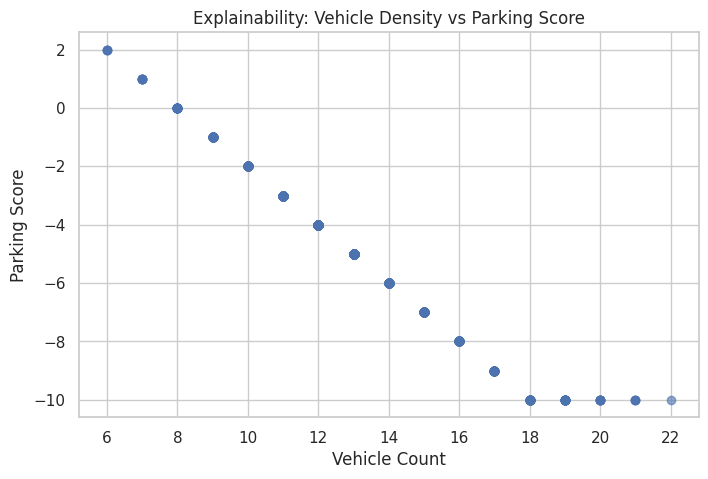

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["vehicle_count"], df["parking_score"], alpha=0.6)
plt.xlabel("Vehicle Count")
plt.ylabel("Parking Score")
plt.title("Explainability: Vehicle Density vs Parking Score")
plt.grid(True)
plt.show()


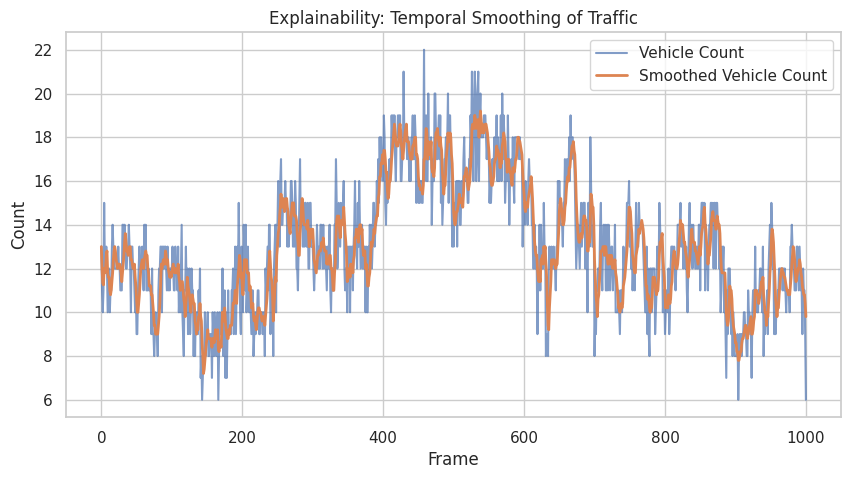

In [52]:
plt.figure(figsize=(10,5))
plt.plot(df["vehicle_count"], label="Vehicle Count", alpha=0.7)
plt.plot(df["avg_vehicle_count"], label="Smoothed Vehicle Count", linewidth=2)
plt.xlabel("Frame")
plt.ylabel("Count")
plt.title("Explainability: Temporal Smoothing of Traffic")
plt.legend()
plt.show()


In [53]:
def decision_label(score):
    if score < 0:
        return "Rejected due to congestion"
    elif score < 15:
        return "Low priority parking"
    elif score < 30:
        return "Moderate priority parking"
    else:
        return "Highly recommended parking"

df["decision_reason"] = df["parking_score"].apply(decision_label)
df[["parking_score", "decision_reason"]].head()


,parking_score,decision_reason
0,-5,Rejected due to congestion
1,-3,Rejected due to congestion
2,-2,Rejected due to congestion
3,-3,Rejected due to congestion
4,-7,Rejected due to congestion
